### Neshyba, 2022
# Analytical $S_{tot}(T)$ for phase transformations

## Key equations

This exercise is all about the spontaneity of phase transformations at a given pressure -- we'll say, the standard atmospheric pressure ($P^o$). Because of this, we'll leave out the pressure in the formulas we give below; the notation is a little less cumbersone that way. For a spontaneous process (indicated by *trs* here), the Second Law requires that

$$
\Delta S_{tot}(T) = \Delta S_{trs}(T) + \Delta S_{surr}(T) > 0 \ \ \ \ (1)
$$  

where we understand the the first term on the right hand side to be the *system's* change in entropy, while the second term is the *surrounding's* change in entropy (at $P^o$). Focusing first on the system, we can say 

$$
\Delta S_{trs}(T) = \Delta S^o + \int_{T^o}^T {\Delta C_P \over T}dT \ \ \ \ (2)
$$

where $trs$ could indicate vaporization, melting, or sublimation, and $T^o$ is the standard temperature, $298 K$. Under the assumption of constant $C_P$, this integrates out to 

$$
\Delta S_{trs}(T) = \Delta S^o + \Delta C_P \ log \big ({T \over T^o} \big ) \ \ \ \ (3)
$$

Meanwhile, we can approximate the second term on the right-hand-side of Eq. (1) as 

$$
\Delta S_{surr}(T) = -{\Delta H_{trs} \over T_{surr}} \ \ \ \ (4)
$$

Throughout this exercise, we'll make the additional assumption that the system is in *thermal equilibrium* with the surroundings, i.e., $T=T_{surr}$.

## Learning Goals
1. I can predict how the entropy change of a system undergoing a phase transformation varies with temperature.
1. I can predict how the entropy change of the surroundings associated with this transformation varies with temperature.
1. I can put these two together to make predictions about the temperature at which a phase transformation will become spontaneous.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

In [3]:
# Here's the standard-state temperature
T0 = AssignQuantity(298,'K')

### Water transitioning from liquid to vapor

The cell below makes use of the following standard-state values of water:

$S_o(liq) = 69.95 \ J/(mol \ K)$  
$S_o(gas) = 188.8 \ J/(mol \ K)$  
$C_P(liq) = 75.4 \ J/(mol \ K)$  
$C_P(gas) = 33.6 \ J/(mol \ K)$  
$\Delta H_{vap}^o = 40.7 \ kJ/mol$


40700 joule / mole
118.85000000000001 joule / kelvin / mole


<IPython.core.display.Javascript object>


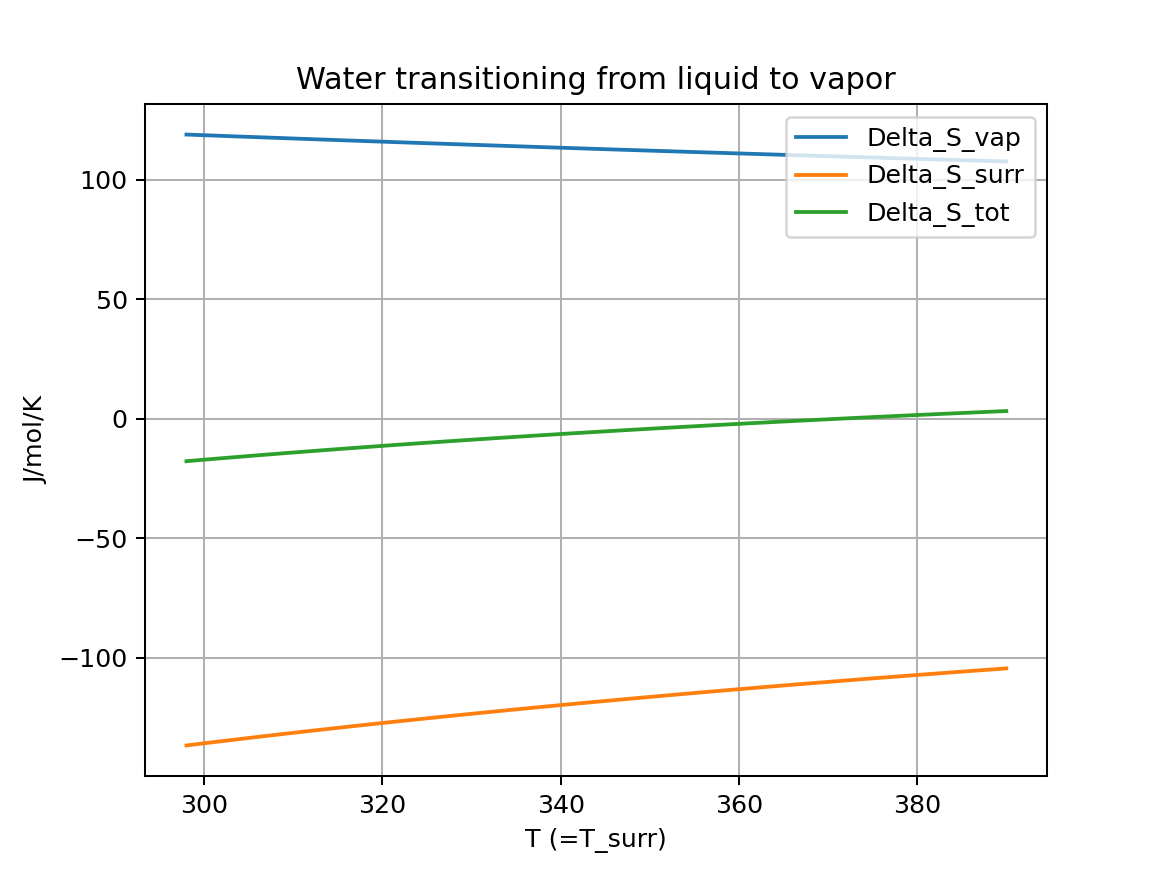

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [4]:
# Lay out an array of temperatures that spans water's boiling temperature
Tmax = AssignQuantity(390,'K')
T_surr = AssignQuantity(np.linspace(T0,Tmax))
T = T_surr

# Standard-state enthalpy of vaporization
Delta_H0_vap = AssignQuantity(40700,'J/mol'); print(Delta_H0_vap)

# Some standard-state entropy values and (from those) the standard-state entropy of vaporization
SS_liq = AssignQuantity(69.95,'J/mol/K')
SS_gas = AssignQuantity(188.8,'J/mol/K')
Delta_S0_vap = SS_gas-SS_liq; print(Delta_S0_vap)

# Difference in heat capacities, and (from that) the entropy of vaporization
CP_liq = AssignQuantity(75.4,'J/mol/K')
CP_gas = AssignQuantity(33.6,'J/mol/K')
Delta_CP = CP_gas-CP_liq
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)

# Impact of vaporization on the entropy of the surroundings
Delta_S_surr = -Delta_H0_vap/T_surr

# Calculating the total entropy change as a function of temperature
Delta_S_tot = Delta_S_vap + Delta_S_surr

# Graphing all three
plt.figure()
plt.plot(T,Delta_S_vap,label='Delta_S_vap')
plt.plot(T,Delta_S_surr,label='Delta_S_surr')
plt.plot(T,Delta_S_tot,label='Delta_S_tot')
plt.grid(True)
plt.title('Water transitioning from liquid to vapor')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
plt.legend()

### Pause for analysis

In the space below, offer responses to the following:

1. The *sign* of $\Delta S_{vap}(T)$ is positive. Why?

1. The *sign* of $\Delta S_{surr}(T)$ is negative. Why?

1. Given that 2nd law says water boiling will become spontanenous at a temperature above the temperature at which $\Delta S_{tot} \approx 0$, use your results to predict the boiling temperature of water. 

1. The number you get for the previous question might be a little different from the known value of $373 K$, because of some approximations that have crept into our analysis. What approximations do you suppose are the most heinous?

### Water transitioning from solid (ice) to liquid
In the cell below, carry out a similar analysis to the above to predict the melting temperature of water ice. Some additional standard-state values you will find useful for this purpose are: 

$S_o(sol) = 44.62 \ J/(mol \ K)$  
$C_P(sol) = 38 \ J/(mol \ K)$  
$\Delta H_{fus}^o = 6.0 \ kJ/mol$

You'll notice that there's a confusing convention here: we're talking about melting, but the label is "fusion." Sorry about that.

Delta_H_fus 6020 joule / mole
Delta_S0_fus_298 25.330000000000005 joule / kelvin / mole


<IPython.core.display.Javascript object>


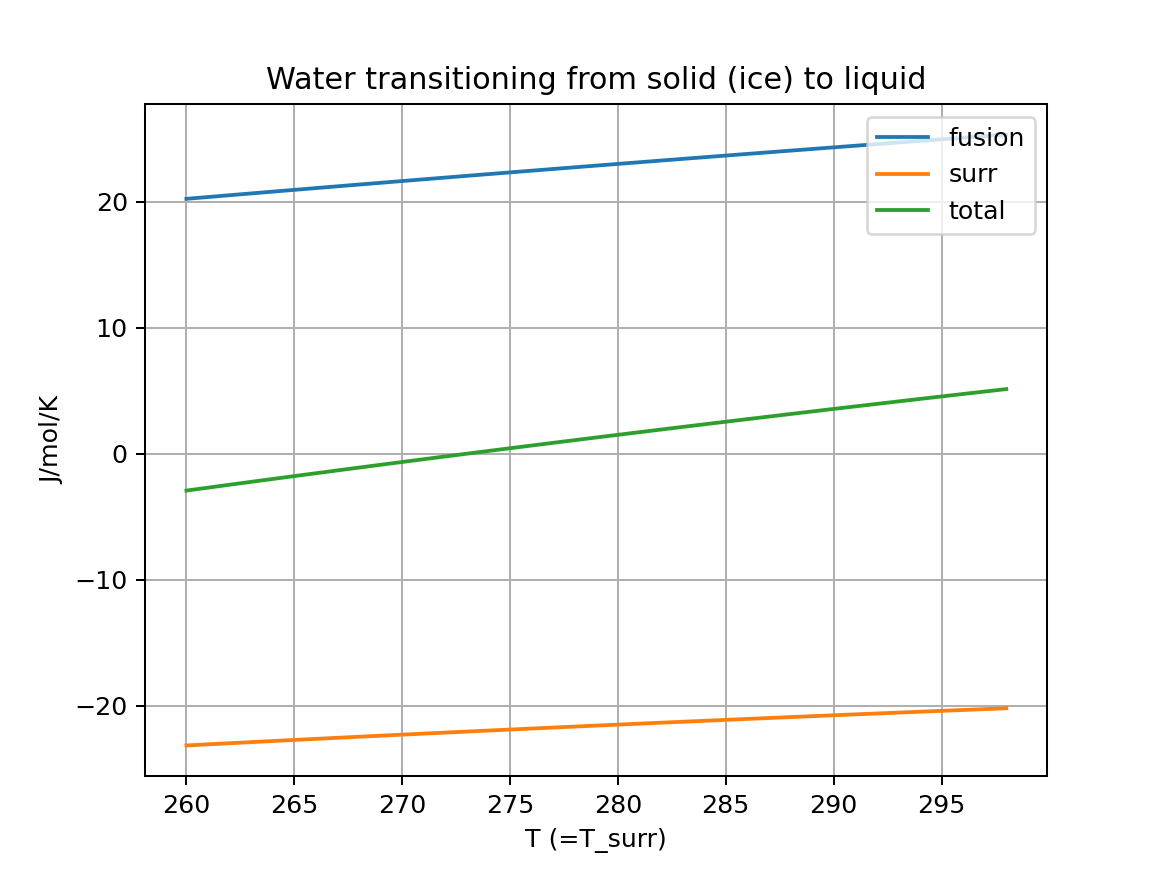

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [5]:
# Laying out an array of temperatures that spans water's melting temperature 
T_surr = AssignQuantity(np.linspace(260,298),'K')
T = T_surr

# Standard-state enthalpy of melting
### BEGIN SOLUTION
Delta_H_fus = AssignQuantity(6020,'J/mol');  print('Delta_H_fus',Delta_H_fus)
### END SOLUTION

# Some standard-state entropy values and (from those) the standard-state entropy of melting
### BEGIN SOLUTION
SS_sol = AssignQuantity(44.62,'J/mol/K')
Delta_S0_fus = SS_liq-SS_sol; print('Delta_S0_fus_298',Delta_S0_fus)
### END SOLUTION

# Difference in heat capacities, and (from that) the entropy of melting
### BEGIN SOLUTION
CP_sol = AssignQuantity(38,'J/mol/K')
Delta_CP = CP_liq-CP_sol
Delta_S_fus = Delta_S0_fus + Delta_CP*np.log(T/T0)
### END SOLUTION

# Impact of melting on the entropy of the surrounding
### BEGIN SOLUTION
Delta_S_surr = -Delta_H_fus/T_surr
### END SOLUTION

# Calculating the total entropy chagne as a function of temperature
Delta_S_tot = Delta_S_fus + Delta_S_surr

# Graphics
### BEGIN SOLUTION
plt.figure()
plt.plot(T,Delta_S_fus, label='fusion')
plt.plot(T,Delta_S_surr,label='surr')
plt.plot(T,Delta_S_tot, label='total')
plt.grid(True)
plt.title('Water transitioning from solid (ice) to liquid')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
plt.legend()
### END SOLUTION

### Pause for analysis

In the cell below, write the temperature at which these data predict that ice will melt.

### Ethanol transitioning from liquid to vapor
Some standard-state values for ethanol that will be handy here:

$S_o(liq) = 160 \ J/(mol \ K)$  
$S_o(gas) = 275 \ J/(mol \ K)$  
$C_P(liq) = 112 \ J/(mol \ K)$  
$C_P(gas) = 70 \ J/(mol \ K)$  
$\Delta H_{vap}^o = 38 \ kJ/mol$

Standard entropy of vaporization= 115 joule / kelvin / mole


<IPython.core.display.Javascript object>


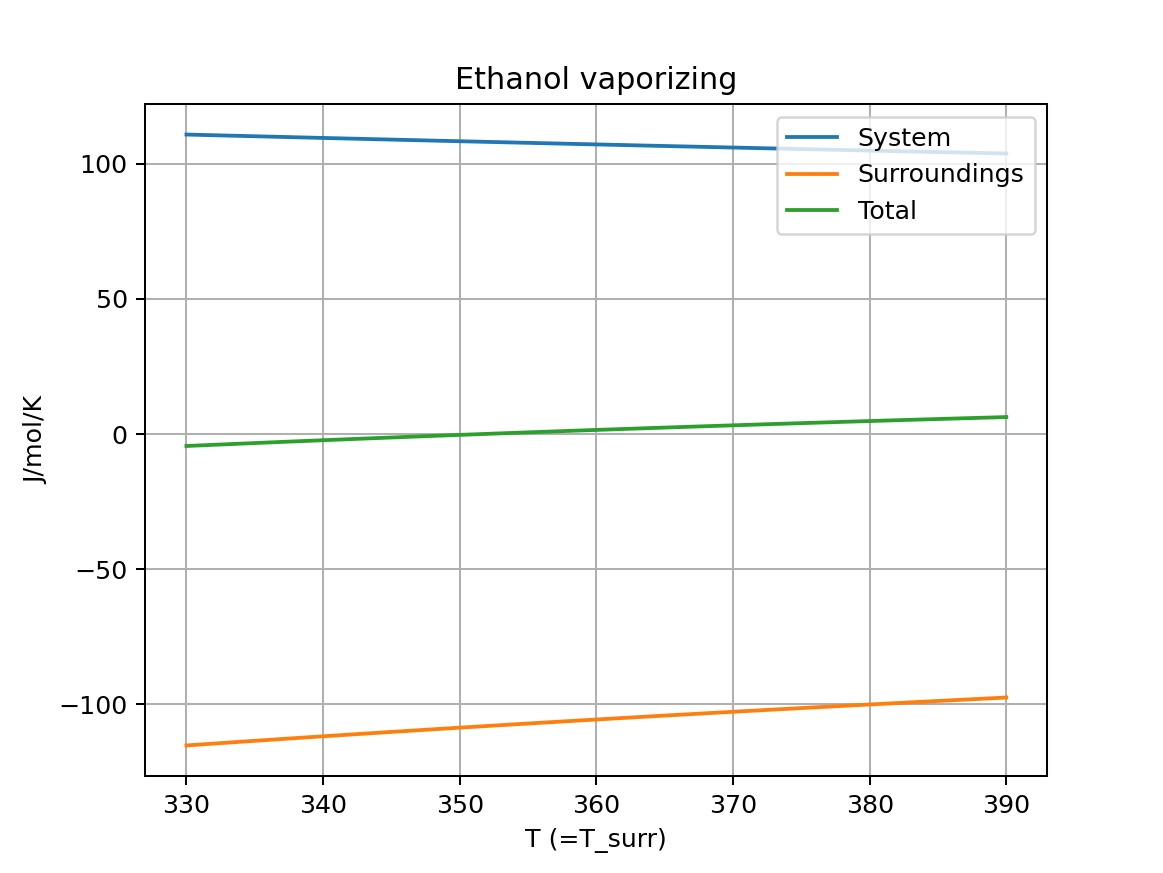

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
# Laying out an array of temperatures that (hopefully) spans ethanol's boiling temperature 
T_surr = AssignQuantity(np.linspace(330,390),'K')
T = T_surr

# Standard-state entalpy of vaporization
### BEGIN SOLUTION
Delta_H_vap = AssignQuantity(38000,'J/mol')
### END SOLUTION

# Some standard-state entropy values and (from those) the standard-state entropy of vaporization
### BEGIN SOLUTION
SS_liq = AssignQuantity(160,'J/mol/K')
SS_gas = AssignQuantity(275,'J/mol/K')
Delta_S0_vap = SS_gas-SS_liq; print('Standard entropy of vaporization=', Delta_S0_vap)
### END SOLUTION

# Difference in heat capacities, and (from that) the entropy of vaporization as a function of temperature
### BEGIN SOLUTION
CP_liq = AssignQuantity(112,'J/mol/K')
CP_gas = AssignQuantity(70,'J/mol/K')
Delta_CP = CP_gas-CP_liq
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)
### END SOLUTION

# Impact of vaporization on the entropy of the surrounding, as a function of temperature
### BEGIN SOLUTION
Delta_S_surr = -Delta_H_vap/T_surr
### END SOLUTION

# Calculate the total entropy change as a function of temperature
### BEGIN SOLUTION
Delta_S_tot = Delta_S_vap + Delta_S_surr
### END SOLUTION

# Graph all three
### BEGIN SOLUTION
plt.figure()
plt.plot(T,Delta_S_vap,  label='System')
plt.plot(T,Delta_S_surr, label='Surroundings')
plt.plot(T,Delta_S_tot,  label='Total')
plt.grid(True)
plt.title('Ethanol vaporizing')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
plt.legend()
### END SOLUTION

### Pause for analysis

In the cell below, write the temperature at which these data predict that pure ethanol will boil.

### Refresh/save/validate/close/submit/logout